# Bernie Sanders Campaign Plan
### Field Targeting: The Path to 270
### Author: Josh Kuppersmith and the Sanders Campaign Team
### Date: April 25, 2019
##### Description: This notebook will walk through a brief clustering analysis of 2020 polling data to provide projections and clusters of states that we expect to behave similarly in the general election. State clusters are used to determine targets for advertisement and field operations. In-house mapping software is used to provide visuals of our expectations for the election. Target states are then analyzed further by breaking down data for individual counties to determine which to target. 

##### Import software needed for this analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import matplotlib.style
import matplotlib as mpl
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
mpl.style.use('classic')

---

# State Analysis: Path to 270

---

##### Load Polling Data

In [2]:
data = pd.read_csv('polling_data.csv')
data.head()

,Unnamed: 0,2012_D,2012_R,2012_I,2016_D,2016_R,2016_I,2020_D,2020_R,2020_I,Error,Votes,Latitude,Longitude,State
0,AL,38.40%,60.50%,1.10%,34.40%,62.10%,3.60%,35.20%,61.80%,3.10%,6.70%,9,32.318231,-86.902298,AL
1,AK,41.20%,55.30%,3.50%,36.60%,51.30%,12.20%,37.50%,52.10%,10.40%,4.30%,3,63.588753,-154.493062,AK
2,AZ,44.60%,53.70%,1.80%,45.10%,48.70%,6.20%,49.70%,45.00%,5.30%,7.00%,11,34.048928,-111.093731,AZ
3,AR,36.90%,60.60%,2.60%,33.70%,60.60%,5.80%,34.30%,60.60%,5.10%,6.00%,6,35.201050,-91.831833,AR
4,CA,60.20%,37.10%,2.60%,61.70%,31.60%,6.70%,46.40%,32.70%,20.90%,5.10%,55,36.778261,-119.417932,CA


##### Data Processing

In [3]:
for column in ['2012_D', '2012_R', '2012_I', '2016_D', '2016_R', '2016_I', '2020_D', '2020_R', '2020_I', 'Error']:
    data[column] = data[column].apply(lambda x: float(x.split('%')[0]))
data.head()

,Unnamed: 0,2012_D,2012_R,2012_I,2016_D,2016_R,2016_I,2020_D,2020_R,2020_I,Error,Votes,Latitude,Longitude,State
0,AL,38.4,60.5,1.1,34.4,62.1,3.6,35.2,61.8,3.1,6.7,9,32.318231,-86.902298,AL
1,AK,41.2,55.3,3.5,36.6,51.3,12.2,37.5,52.1,10.4,4.3,3,63.588753,-154.493062,AK
2,AZ,44.6,53.7,1.8,45.1,48.7,6.2,49.7,45.0,5.3,7.0,11,34.048928,-111.093731,AZ
3,AR,36.9,60.6,2.6,33.7,60.6,5.8,34.3,60.6,5.1,6.0,6,35.201050,-91.831833,AR
4,CA,60.2,37.1,2.6,61.7,31.6,6.7,46.4,32.7,20.9,5.1,55,36.778261,-119.417932,CA


##### Generate 2024 Projections using quadratic regression to account for the Blue Wave

In [4]:
# add 2024 columns for better predictions
data['2024_D'] = [0] * len(data)
data['2024_R'] = [0] * len(data)
data['2024_I'] = [0] * len(data)

for index, row in data.iterrows():
    
    indices = np.array([2012.0,2016.0,2020.0])
    test_index = np.array(2024.0)
    dems_train = np.array(row[['2012_D', '2016_D', '2020_D']]).reshape(1, -1)
    reps_train = np.array(row[['2012_R', '2016_R', '2020_R']]).reshape(1, -1)
    inds_train = np.array(row[['2012_I', '2016_I', '2020_I']]).reshape(1, -1)
    
    model_1 = sm.OLS(dems_train[0], indices).fit()
    data.at[index, '2024_D'] = model_1.predict(test_index)
    
    model_2 = sm.OLS(reps_train[0], indices).fit()
    data.at[index, '2024_R'] = model_2.predict(test_index)
    
    model_3 = sm.OLS(inds_train[0], indices).fit()
    data.at[index, '2024_I'] = model_3.predict(test_index)
    
data.head()

,Unnamed: 0,2012_D,2012_R,2012_I,2016_D,2016_R,2016_I,2020_D,2020_R,2020_I,Error,Votes,Latitude,Longitude,State,2024_D,2024_R,2024_I
0,AL,38.4,60.5,1.1,34.4,62.1,3.6,35.2,61.8,3.1,6.7,9,32.318231,-86.902298,AL,36,61,2
1,AK,41.2,55.3,3.5,36.6,51.3,12.2,37.5,52.1,10.4,4.3,3,63.588753,-154.493062,AK,38,53,8
2,AZ,44.6,53.7,1.8,45.1,48.7,6.2,49.7,45.0,5.3,7.0,11,34.048928,-111.093731,AZ,46,49,4
3,AR,36.9,60.6,2.6,33.7,60.6,5.8,34.3,60.6,5.1,6.0,6,35.201050,-91.831833,AR,35,60,4
4,CA,60.2,37.1,2.6,61.7,31.6,6.7,46.4,32.7,20.9,5.1,55,36.778261,-119.417932,CA,56,33,10


##### Elbow Plot for Rigorous Optimal Number of Clusters

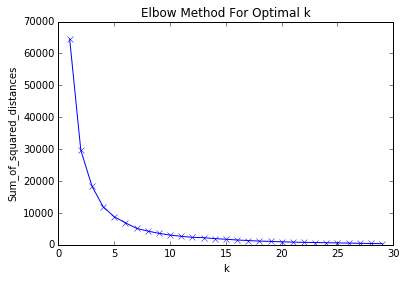

In [5]:
# elbow plot for best number of clusters

cols = ['2012_D', '2012_R', '2012_I', '2016_D', '2016_R', '2016_I', '2020_D', '2020_R', '2020_I','2024_D', '2024_R', '2024_I', 'Error']
Sum_of_squared_distances = []
K = range(1,30)
for k in K:
    km = KMeans(n_clusters=k, random_state=0).fit(data[cols])
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

##### Perform and Save Results for Optimal K=7

In [6]:
kmeans = KMeans(n_clusters=7, random_state=0).fit(data[cols])

labels = kmeans.labels_
data['clust_labels'] = labels

##### Print Results

In [7]:
cluster_data = []

for label in list(set(list(data['clust_labels']))):
    data_clust = data[data['clust_labels'] == label]
    individual = {}
    print("Cluster Number: " + str(label))
    print("States: " + str(list(data_clust['Unnamed: 0'])))
    print("Total electoral votes: " + str(sum(data_clust['Votes'])))
    print("2020 Average Dem Support: " + str(np.mean(data_clust['2020_D'])))
    print("2020 Average Rep Support: " + str(np.mean(data_clust['2020_R'])))
    individual['num'] = label
    individual['votes'] = sum(data_clust['Votes'])
    individual['dems'] = np.mean(data_clust['2020_D'])
    individual['reps'] = np.mean(data_clust['2020_R'])
    individual['states'] = str(list(data_clust['Unnamed: 0']))
    cluster_data.append(individual)
    print()
    print('------------------')
    print()

Cluster Number: 0
States: ['AL', 'AK', 'AR', 'IN', 'KS', 'KY', 'LA', 'MS', 'MO', 'MT', 'NE 1', 'SC', 'SD', 'TN', 'TX']
Total electoral votes: 132
2020 Average Dem Support: 37.459999999999994
2020 Average Rep Support: 57.58

------------------

Cluster Number: 1
States: ['CT', 'DE', 'HI', 'IL', 'Maine 1', 'MD', 'MA', 'NJ ', 'OR', 'RI']
Total electoral votes: 81
2020 Average Dem Support: 56.07000000000001
2020 Average Rep Support: 37.74

------------------

Cluster Number: 2
States: ['AZ', 'CO', 'FL', 'GA', 'IA', 'Maine 2', 'MI', 'MN', 'NE 2', 'NV', 'NH', 'NC', 'OH', 'PA', 'VA', 'WI']
Total electoral votes: 185
2020 Average Dem Support: 46.756249999999994
2020 Average Rep Support: 47.293749999999996

------------------

Cluster Number: 3
States: ['DC']
Total electoral votes: 3
2020 Average Dem Support: 90.9
2020 Average Rep Support: 4.7

------------------

Cluster Number: 4
States: ['CA', 'NM', 'NY', 'VT', 'WA']
Total electoral votes: 104
2020 Average Dem Support: 45.58
2020 Average Rep

##### Analyze individually states in the 'Battleground' Category

In [8]:
import copy

battleground_states = copy.deepcopy(data[data.clust_labels==2])
kmeans = KMeans(n_clusters=4, random_state=0).fit(battleground_states[cols])

border_labels = kmeans.labels_
battleground_states['border_clusters'] = border_labels                                                     

##### Perform KMeans Clustering for k=16 and Print Results

In [9]:
kmeans = KMeans(n_clusters=16, random_state=0).fit(data[cols])

labels = kmeans.labels_
data['clust_labels_take2'] = labels

cluster_data_2 = []

for label in list(set(list(data['clust_labels_take2']))):
    data_clust = data[data['clust_labels_take2'] == label]
    individual = {}
    print("Cluster Number: " + str(label))
    print("States: " + str(list(data_clust['Unnamed: 0'])))
    print("Total electoral votes: " + str(sum(data_clust['Votes'])))
    print("2020 Average Dem Support: " + str(np.mean(data_clust['2020_D'])))
    print("2020 Average Rep Support: " + str(np.mean(data_clust['2020_R'])))
    individual['num'] = label
    individual['votes'] = sum(data_clust['Votes'])
    individual['dems'] = np.mean(data_clust['2020_D'])
    individual['reps'] = np.mean(data_clust['2020_R'])
    individual['states'] = str(list(data_clust['Unnamed: 0']))
    cluster_data_2.append(individual)
    print()
    print('------------------')
    print()

Cluster Number: 0
States: ['AZ', 'FL', 'GA', 'NE 2', 'NC']
Total electoral votes: 72
2020 Average Dem Support: 47.059999999999995
2020 Average Rep Support: 48.720000000000006

------------------

Cluster Number: 1
States: ['DC']
Total electoral votes: 3
2020 Average Dem Support: 90.9
2020 Average Rep Support: 4.7

------------------

Cluster Number: 2
States: ['MD', 'MA']
Total electoral votes: 21
2020 Average Dem Support: 60.45
2020 Average Rep Support: 34.05

------------------

Cluster Number: 3
States: ['NE 3', 'WY']
Total electoral votes: 4
2020 Average Dem Support: 22.200000000000003
2020 Average Rep Support: 70.75

------------------

Cluster Number: 4
States: ['AL', 'AR', 'KY', 'SD', 'TN']
Total electoral votes: 37
2020 Average Dem Support: 34.44
2020 Average Rep Support: 61.160000000000004

------------------

Cluster Number: 5
States: ['CO', 'MI', 'MN', 'NV', 'PA', 'VA', 'WI']
Total electoral votes: 84
2020 Average Dem Support: 48.528571428571425
2020 Average Rep Support: 45.

##### Rank Clustering by Democratic Support (D-R)

In [10]:
# make a column for ranked clusters by support

dem_supports = []
for label in list(set(list(data['clust_labels_take2']))):
    data_clust = data[data['clust_labels_take2'] == label]
    dem_support = np.mean(data_clust['2020_D']) - np.mean(data_clust['2020_R'])
    dem_supports.append({'index': label, 'support': dem_support})
    
new_support = sorted(dem_supports, reverse=True, key=lambda k: k['support']) 

ranked_cluster_list = []
for i in range(len(data)):
    cluster = list(data.clust_labels_take2)[i]
    for j in range(len(new_support)):
        if new_support[j]['index'] == cluster:
            ranked_cluster_list.append(j)
    
data['ranked_cluster'] = ranked_cluster_list

##### Tipping Point Analysis

In [11]:
# GO THROUGH AND SHOW TIPPING POINT

print("TIPPING POINT ANALYSIS")
print("RANKING CLUSTERS BY DEMOCRATIC FAVORABILITY")
print()
print()
print()

max_clust = np.max(np.array(list(data.ranked_cluster)))
total_states = []
total_votes = 0

for i in range(max_clust):
    data_clust = data[data['ranked_cluster'] == i]
    
    print("Step " + str(i) + ":")
    print("States Won: " + str(list(data_clust['Unnamed: 0'])))
    total_states.extend(list(data_clust['Unnamed: 0']))
    print("New States Dem Pref: " + str(np.mean(data_clust['2020_D'])) + ", New States Rep Pref: " + str(np.mean(data_clust['2020_R'])))
    print("Total States: " + str(total_states))
    print("Electoral Votes Won: " + str(sum(data_clust['Votes'])))
    total_votes = total_votes + sum(data_clust['Votes'])
    print("Total Electoral Votes: " + str(total_votes))
    print()
    print('-----------------------------------------')
    print()
    

TIPPING POINT ANALYSIS
RANKING CLUSTERS BY DEMOCRATIC FAVORABILITY



Step 0:
States Won: ['DC']
New States Dem Pref: 90.9, New States Rep Pref: 4.7
Total States: ['DC']
Electoral Votes Won: 3
Total Electoral Votes: 3

-----------------------------------------

Step 1:
States Won: ['HI']
New States Dem Pref: 63.9, New States Rep Pref: 29.6
Total States: ['DC', 'HI']
Electoral Votes Won: 4
Total Electoral Votes: 7

-----------------------------------------

Step 2:
States Won: ['MD', 'MA']
New States Dem Pref: 60.45, New States Rep Pref: 34.05
Total States: ['DC', 'HI', 'MD', 'MA']
Electoral Votes Won: 21
Total Electoral Votes: 28

-----------------------------------------

Step 3:
States Won: ['CA', 'NY', 'VT']
New States Dem Pref: 46.79999999999999, New States Rep Pref: 31.26666666666667
Total States: ['DC', 'HI', 'MD', 'MA', 'CA', 'NY', 'VT']
Electoral Votes Won: 87
Total Electoral Votes: 115

-----------------------------------------

Step 4:
States Won: ['CT', 'DE', 'IL', 'Maine 1'

### Visualize Results

##### Load State Boundary Data for Mapping

In [12]:
us_map = gpd.read_file('states_21basic/states.shp')
us_map

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,(POLYGON ((-160.0738033454681 22.0041773479577...
1,Washington,2,53,Pacific,WA,(POLYGON ((-122.4020153103835 48.2252163723779...
2,Montana,3,30,Mountain,MT,POLYGON ((-111.4754253002074 44.70216236909688...
3,Maine,4,23,New England,ME,(POLYGON ((-69.77727626137293 44.0741483685119...
4,North Dakota,5,38,West North Central,ND,POLYGON ((-98.73043728833767 45.93827137024809...
5,South Dakota,6,46,West North Central,SD,POLYGON ((-102.7883842921169 42.99530336750724...
6,Wyoming,7,56,Mountain,WY,POLYGON ((-104.0536152932953 41.69821836629923...
7,Wisconsin,8,55,East North Central,WI,(POLYGON ((-87.74855527810999 44.9616163693385...
8,Idaho,9,16,Mountain,ID,"POLYGON ((-117.026295305377 43.67903136814401,..."
9,Vermont,10,50,New England,VT,POLYGON ((-73.25806026461467 42.74605836727511...


##### Merge State Boundary Data with Cluster Data

In [13]:
clusters = []

for index, row in us_map.iterrows():
    state = row['STATE_ABBR']
    cluster = list(data[data.State == state].ranked_cluster)
    if len(cluster) > 1:
        cluster = [-1]
        
    clusters.append(int(cluster[0]))

us_map['cluster'] = clusters
us_map

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry,cluster
0,Hawaii,1,15,Pacific,HI,(POLYGON ((-160.0738033454681 22.0041773479577...,1
1,Washington,2,53,Pacific,WA,(POLYGON ((-122.4020153103835 48.2252163723779...,5
2,Montana,3,30,Mountain,MT,POLYGON ((-111.4754253002074 44.70216236909688...,10
3,Maine,4,23,New England,ME,(POLYGON ((-69.77727626137293 44.0741483685119...,-1
4,North Dakota,5,38,West North Central,ND,POLYGON ((-98.73043728833767 45.93827137024809...,13
5,South Dakota,6,46,West North Central,SD,POLYGON ((-102.7883842921169 42.99530336750724...,12
6,Wyoming,7,56,Mountain,WY,POLYGON ((-104.0536152932953 41.69821836629923...,15
7,Wisconsin,8,55,East North Central,WI,(POLYGON ((-87.74855527810999 44.9616163693385...,6
8,Idaho,9,16,Mountain,ID,"POLYGON ((-117.026295305377 43.67903136814401,...",13
9,Vermont,10,50,New England,VT,POLYGON ((-73.25806026461467 42.74605836727511...,3


##### Important Mapping Settings

In [14]:
fig_size = plt.rcParams["figure.figsize"]
print("Current size:" + str(fig_size))
fig_size[0] = 14
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size
print("Current size:" + str(fig_size))

cmap_politics = matplotlib.colors.LinearSegmentedColormap.from_list("", ["navy","darkblue","blue","azure","lightblue","salmon","coral","red","crimson", "maroon"])


Current size:[6.0, 4.0]
Current size:[14, 12]


##### Plot Lower 48 States + DC

/Users/joshkuppersmith/anaconda3/lib/python3.7/site-packages/pysal/__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysalnext` package. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)
/Users/joshkuppersmith/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/joshkuppersmith/anaconda3/lib/python3.7/site-packages/pysal/esda/mapclassify.py:702: RuntimeWarning: invalid value encountered in double_scalars
  gadf =

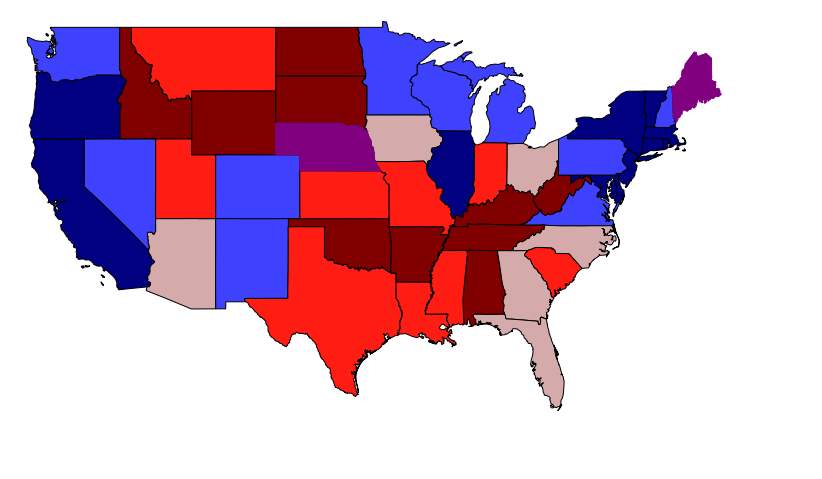

In [15]:
import geoplot

states = list(range(1,50))
states.remove(3)
states.remove(15)

fig = plt.figure(1)
ax1 = plt.subplot(111)
fig.set_figheight(8)
fig.set_figwidth(14)

p1 = geoplot.choropleth(us_map.loc[states, :], hue='cluster', cmap=cmap_politics, ax=ax1)
p2 = geoplot.choropleth(us_map[3:4], hue='cluster', ax=ax1, color= "purple", edgecolor='black')
p3 = geoplot.choropleth(us_map[15:16], hue='cluster', ax=ax1, color= "purple", edgecolor='black')
plt.xlim(-125,-60)
plt.ylim(22,50)
plt.axis('off')
plt.show()

##### Hawaii

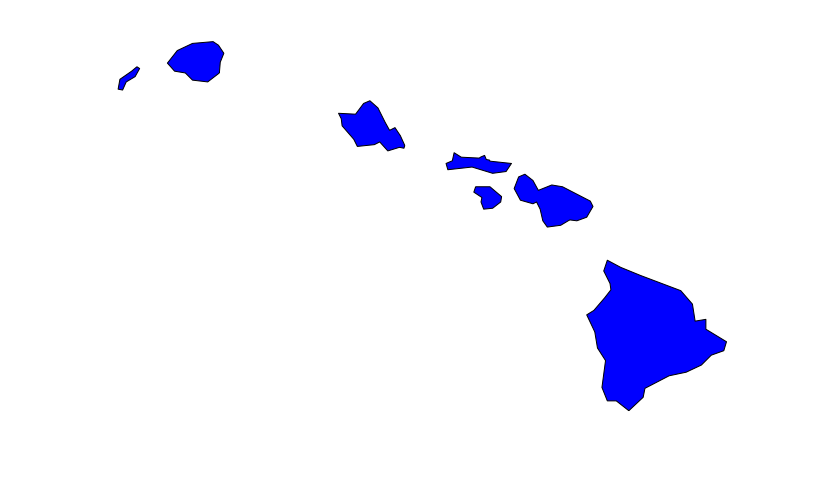

In [16]:
us_map.loc[[0], :].plot()
plt.axis('off')
plt.show()

##### Alaska

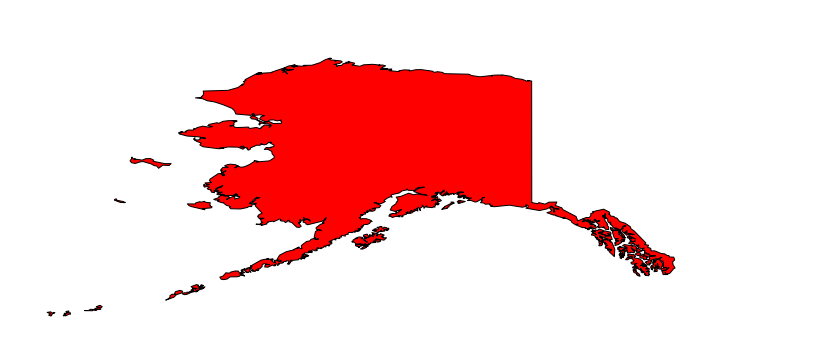

In [17]:
us_map.loc[[50], :].plot(color = 'red')
plt.axis('off')
plt.show()

---

# County Analysis: Winning Key Votes

#### We want to target young, diverse, urban communities in these key states to drive high turnout in these communities and capitalize on 2018 gains in these challenging state to flip the state for 2020.

---

##### Load Census Data on Age and Race to build County Database

In [18]:
age = pd.read_csv('demographics/age.csv')
age['County'] = age.Geography.apply(lambda x: x.split(' County')[0])
age['State'] = age.Geography.apply(lambda x: x.split('County, ')[1])
print(len(age))
age.head()

341


,Id,Id2,Geography,Estimate; Total:,Margin of Error; Total:,Estimate; Male:,Margin of Error; Male:,Estimate; Male: - Under 5 years,Margin of Error; Male: - Under 5 years,Estimate; Male: - 5 to 9 years,Margin of Error; Male: - 5 to 9 years,Estimate; Male: - 10 to 14 years,Margin of Error; Male: - 10 to 14 years,Estimate; Male: - 15 to 17 years,Margin of Error; Male: - 15 to 17 years,Estimate; Male: - 18 and 19 years,Margin of Error; Male: - 18 and 19 years,Estimate; Male: - 20 years,Margin of Error; Male: - 20 years,Estimate; Male: - 21 years,Margin of Error; Male: - 21 years,Estimate; Male: - 22 to 24 years,Margin of Error; Male: - 22 to 24 years,Estimate; Male: - 25 to 29 years,Margin of Error; Male: - 25 to 29 years,Estimate; Male: - 30 to 34 years,Margin of Error; Male: - 30 to 34 years,Estimate; Male: - 35 to 39 years,Margin of Error; Male: - 35 to 39 years,Estimate; Male: - 40 to 44 years,Margin of Error; Male: - 40 to 44 years,Estimate; Male: - 45 to 49 years,Margin of Error; Male: - 45 to 49 years,Estimate; Male: - 50 to 54 years,Margin of Error; Male: - 50 to 54 years,Estimate; Male: - 55 to 59 years,Margin of Error; Male: - 55 to 59 years,Estimate; Male: - 60 and 61 years,Margin of Error; Male: - 60 and 61 years,Estimate; Male: - 62 to 64 years,Margin of Error; Male: - 62 to 64 years,Estimate; Male: - 65 and 66 years,Margin of Error; Male: - 65 and 66 years,Estimate; Male: - 67 to 69 years,Margin of Error; Male: - 67 to 69 years,Estimate; Male: - 70 to 74 years,Margin of Error; Male: - 70 to 74 years,Estimate; Male: - 75 to 79 years,Margin of Error; Male: - 75 to 79 years,Estimate; Male: - 80 to 84 years,Margin of Error; Male: - 80 to 84 years,Estimate; Male: - 85 years and over,Margin of Error; Male: - 85 years and over,Estimate; Female:,Margin of Error; Female:,Estimate; Female: - Under 5 years,Margin of Error; Female: - Under 5 years,Estimate; Female: - 5 to 9 years,Margin of Error; Female: - 5 to 9 years,Estimate; Female: - 10 to 14 years,Margin of Error; Female: - 10 to 14 years,Estimate; Female: - 15 to 17 years,Margin of Error; Female: - 15 to 17 years,Estimate; Female: - 18 and 19 years,Margin of Error; Female: - 18 and 19 years,Estimate; Female: - 20 years,Margin of Error; Female: - 20 years,Estimate; Female: - 21 years,Margin of Error; Female: - 21 years,Estimate; Female: - 22 to 24 years,Margin of Error; Female: - 22 to 24 years,Estimate; Female: - 25 to 29 years,Margin of Error; Female: - 25 to 29 years,Estimate; Female: - 30 to 34 years,Margin of Error; Female: - 30 to 34 years,Estimate; Female: - 35 to 39 years,Margin of Error; Female: - 35 to 39 years,Estimate; Female: - 40 to 44 years,Margin of Error; Female: - 40 to 44 years,Estimate; Female: - 45 to 49 years,Margin of Error; Female: - 45 to 49 years,Estimate; Female: - 50 to 54 years,Margin of Error; Female: - 50 to 54 years,Estimate; Female: - 55 to 59 years,Margin of Error; Female: - 55 to 59 years,Estimate; Female: - 60 and 61 years,Margin of Error; Female: - 60 and 61 years,Estimate; Female: - 62 to 64 years,Margin of Error; Female: - 62 to 64 years,Estimate; Female: - 65 and 66 years,Margin of Error; Female: - 65 and 66 years,Estimate; Female: - 67 to 69 years,Margin of Error; Female: - 67 to 69 years,Estimate; Female: - 70 to 74 years,Margin of Error; Female: - 70 to 74 years,Estimate; Female: - 75 to 79 years,Margin of Error; Female: - 75 to 79 years,Estimate; Female: - 80 to 84 years,Margin of Error; Female: - 80 to 84 years,Estimate; Female: - 85 years and over,Margin of Error; Female: - 85 years and over,2018_DEM,County,State
0,0500000US04001,4001,"Apache County, Arizona",71602,*****,35355,106,2575,72,2856,192,2833,193,1710,19,1290,79,643,183,514,90,1314,182,2502,93,2061,59,2117,183,1928,189,2000,54,2347,55,2118,180,878,162,1180,166,599,84,1005,107,1147,112,846,107,492,102,400,106,36247,106,2556,38,2722,190,3134,189,1954,46,1271,104,580,113,520,109,1364,133,2092,33,1947,20,1944,175,1772,144,2087,75,2393,70,2351,157,890,106,1272,158,855,147,1

In [19]:
race = pd.read_csv('demographics/race.csv')
age['County'] = age.Geography.apply(lambda x: x.split(' County')[0])
age['State'] = age.Geography.apply(lambda x: x.split('County, ')[1])
race.head()

,Id,Id2,Geography,Estimate; Total:,Margin of Error; Total:,Estimate; Total: - White alone,Margin of Error; Total: - White alone,Estimate; Total: - Black or African American alone,Margin of Error; Total: - Black or African American alone,Estimate; Total: - American Indian and Alaska Native alone,Margin of Error; Total: - American Indian and Alaska Native alone,Estimate; Total: - Asian alone,Margin of Error; Total: - Asian alone,Estimate; Total: - Native Hawaiian and Other Pacific Islander alone,Margin of Error; Total: - Native Hawaiian and Other Pacific Islander alone,Estimate; Total: - Some other race alone,Margin of Error; Total: - Some other race alone,Estimate; Total: - Two or more races:,Margin of Error; Total: - Two or more races:,Estimate; Total: - Two or more races: - Two races including Some other race,Margin of Error; Total: - Two or more races: - Two races including Some other race,"Estimate; Total: - Two or more races: - Two races excluding Some other race, and three or more races","Margin of Error; Total: - Two or more races: - Two races excluding Some other race, and three or more races"
0,0500000US04001,4001,"Apache County, Arizona",71602,*****,16314,302,364,134,52488,342,248,84,61,62,505,179,1622,437,185,118,1437,416
1,0500000US04003,4003,"Cochise County, Arizona",126516,*****,106782,965,4786,413,1548,262,2298,213,507,71,4842,884,5753,734,1000,289,4753,644
2,0500000US04005,4005,"Coconino County, Arizona",138639,*****,88147,779,1986,241,36850,681,2590,244,196,45,3915,671,4955,658,594,238,4361,640
3,0500000US04007,4007,"Gila County, Arizona",53145,*****,41211,516,300,112,8419,215,467,35,0,29,1219,485,1529,321,147,102,1382,293
4,0500000US04009,4009,"Graham County, Arizona",37700,*****,29782,402,750,95,4974,257,279,25,59,46,878,298,978,351,235,124,743,322


In [20]:
counties = pd.read_csv('county_data/county_fips.csv')
counties.head()

,msa,pmsa,county,state,county_fips,state_fips
0,NaN,NaN,Aleutians East,AK,13,2
1,NaN,NaN,Aleutians West,AK,16,2
2,380.0,NaN,Anchorage,AK,20,2
3,NaN,NaN,Bethel,AK,50,2
4,NaN,NaN,Bristol Bay,AK,60,2


##### Load County Voting Dataset

In [21]:
voting = pd.read_csv('county_pres.csv')
voting.head()

,year,state,state_po,county,FIPS,office,candidate,party,candidatevotes,totalvotes,version
0,2000,Alabama,AL,Autauga,1001.0,President,Al Gore,democrat,4942.0,17208.0,20181011
1,2000,Alabama,AL,Autauga,1001.0,President,George W. Bush,republican,11993.0,17208.0,20181011
2,2000,Alabama,AL,Autauga,1001.0,President,Ralph Nader,green,160.0,17208.0,20181011
3,2000,Alabama,o,Autauga,1001.0,President,Other,NaN,113.0,17208.0,20181011
4,2000,Alabama,AL,Baldwin,1003.0,President,Al Gore,democrat,13997.0,56480.0,20181011


In [22]:
states = ['Arizona', 'Georgia', 'Florida', 'North Carolina']
voting = voting[voting['state'].isin(states)]
counties = set(list(voting.county))
    
county_list = []
d_2016 = []
r_2016 = []
d_2012 = []
r_2012 = []
geography = []
for state in states:
    state_data = voting[voting['state'] == state]
    counties = set(list(state_data.county))
    for county in counties:
        county_list.append(county)
        county_data = voting[voting.county == county]
        data_2016 = county_data[county_data.year == 2016]
        data_2012 = county_data[county_data.year == 2012]
    
        dem_2016 = data_2016[data_2016.party == 'democrat']
        dem_2012 = data_2012[data_2012.party == 'democrat']
        rep_2016 = data_2016[data_2016.party == 'republican']
        rep_2012 = data_2012[data_2012.party == 'republican']
    
        d_2016.append(list(dem_2016.candidatevotes)[0]*1.0/list(dem_2016.totalvotes)[0])
        d_2012.append(list(dem_2012.candidatevotes)[0]*1.0/list(dem_2012.totalvotes)[0])
        r_2016.append(list(rep_2016.candidatevotes)[0]*1.0/list(rep_2016.totalvotes)[0])
        r_2012.append(list(rep_2012.candidatevotes)[0]*1.0/list(rep_2012.totalvotes)[0])
        geography.append(county + " County, " + str(state))

county_voting = pd.DataFrame({'County': list(county_list), 'Geography': geography, '2016_r': r_2016, '2012_r': r_2012, '2016_d': d_2016, '2012_d': d_2012})
county_voting['2016_r'].apply(lambda x: x*100.0)
county_voting['2012_r'].apply(lambda x: x*100.0)
county_voting['2016_d'].apply(lambda x: x*100.0)
county_voting['2012_d'].apply(lambda x: x*100.0)
#county_voting['Geography'] = county_voting['County'].apply(lambda x: x + " County")
county_voting.to_csv("County_voting.csv")
county_voting.head()


,County,Geography,2016_r,2012_r,2016_d,2012_d
0,Greenlee,"Greenlee County, Arizona",0.364407,0.535306,0.210324,0.440484
1,Cochise,"Cochise County, Arizona",0.561671,0.601943,0.348895,0.378467
2,Gila,"Gila County, Arizona",0.386462,0.625000,0.190833,0.357534
3,Graham,"Graham County, Arizona",0.395203,0.681232,0.162563,0.304429
4,Apache,"Apache County, Arizona",0.297892,0.319174,0.617584,0.663378


##### Merge Datasets

In [23]:
demographic_data = pd.merge(age, race, on='Geography')
print(len(demographic_data))
demographic_data.head()

341


,Id_x,Id2_x,Geography,Estimate; Total:_x,Margin of Error; Total:_x,Estimate; Male:,Margin of Error; Male:,Estimate; Male: - Under 5 years,Margin of Error; Male: - Under 5 years,Estimate; Male: - 5 to 9 years,Margin of Error; Male: - 5 to 9 years,Estimate; Male: - 10 to 14 years,Margin of Error; Male: - 10 to 14 years,Estimate; Male: - 15 to 17 years,Margin of Error; Male: - 15 to 17 years,Estimate; Male: - 18 and 19 years,Margin of Error; Male: - 18 and 19 years,Estimate; Male: - 20 years,Margin of Error; Male: - 20 years,Estimate; Male: - 21 years,Margin of Error; Male: - 21 years,Estimate; Male: - 22 to 24 years,Margin of Error; Male: - 22 to 24 years,Estimate; Male: - 25 to 29 years,Margin of Error; Male: - 25 to 29 years,Estimate; Male: - 30 to 34 years,Margin of Error; Male: - 30 to 34 years,Estimate; Male: - 35 to 39 years,Margin of Error; Male: - 35 to 39 years,Estimate; Male: - 40 to 44 years,Margin of Error; Male: - 40 to 44 years,Estimate; Male: - 45 to 49 years,Margin of Error; Male: - 45 to 49 years,Estimate; Male: - 50 to 54 years,Margin of Error; Male: - 50 to 54 years,Estimate; Male: - 55 to 59 years,Margin of Error; Male: - 55 to 59 years,Estimate; Male: - 60 and 61 years,Margin of Error; Male: - 60 and 61 years,Estimate; Male: - 62 to 64 years,Margin of Error; Male: - 62 to 64 years,Estimate; Male: - 65 and 66 years,Margin of Error; Male: - 65 and 66 years,Estimate; Male: - 67 to 69 years,Margin of Error; Male: - 67 to 69 years,Estimate; Male: - 70 to 74 years,Margin of Error; Male: - 70 to 74 years,Estimate; Male: - 75 to 79 years,Margin of Error; Male: - 75 to 79 years,Estimate; Male: - 80 to 84 years,Margin of Error; Male: - 80 to 84 years,Estimate; Male: - 85 years and over,Margin of Error; Male: - 85 years and over,Estimate; Female:,Margin of Error; Female:,Estimate; Female: - Under 5 years,Margin of Error; Female: - Under 5 years,Estimate; Female: - 5 to 9 years,Margin of Error; Female: - 5 to 9 years,Estimate; Female: - 10 to 14 years,Margin of Error; Female: - 10 to 14 years,Estimate; Female: - 15 to 17 years,Margin of Error; Female: - 15 to 17 years,Estimate; Female: - 18 and 19 years,Margin of Error; Female: - 18 and 19 years,Estimate; Female: - 20 years,Margin of Error; Female: - 20 years,Estimate; Female: - 21 years,Margin of Error; Female: - 21 years,Estimate; Female: - 22 to 24 years,Margin of Error; Female: - 22 to 24 years,Estimate; Female: - 25 to 29 years,Margin of Error; Female: - 25 to 29 years,Estimate; Female: - 30 to 34 years,Margin of Error; Female: - 30 to 34 years,Estimate; Female: - 35 to 39 years,Margin of Error; Female: - 35 to 39 years,Estimate; Female: - 40 to 44 years,Margin of Error; Female: - 40 to 44 years,Estimate; Female: - 45 to 49 years,Margin of Error; Female: - 45 to 49 years,Estimate; Female: - 50 to 54 years,Margin of Error; Female: - 50 to 54 years,Estimate; Female: - 55 to 59 years,Margin of Error; Female: - 55 to 59 years,Estimate; Female: - 60 and 61 years,Margin of Error; Female: - 60 and 61 years,Estimate; Female: - 62 to 64 years,Margin of Error; Female: - 62 to 64 years,Estimate; Female: - 65 and 66 years,Margin of Error; Female: - 65 and 66 years,Estimate; Female: - 67 to 69 years,Margin of Error; Female: - 67 to 69 years,Estimate; Female: - 70 to 74 years,Margin of Error; Female: - 70 to 74 years,Estimate; Female: - 75 to 79 years,Margin of Error; Female: - 75 to 79 years,Estimate; Female: - 80 to 84 years,Margin of Error; Female: - 80 to 84 years,Estimate; Female: - 85 years and over,Margin of Error; Female: - 85 years and over,2018_DEM,County,State,Id_y,Id2_y,Estimate; Total:_y,Margin of Error; Total:_y,Estimate; Total: - White alone,Margin of Error; Total: - White alone,Estimate; Total: - Black or African American alone,Margin of Error; Total: - Black or African American alone,Estimate; Total: - American Indian and Alaska Native alone,Margin of Error; Total: - American Indian and Alaska Native alone,Estimate; Total: - Asian alone,Margin of Error; Total: -

In [24]:
demographic_data = pd.merge(demographic_data, county_voting, on='Geography')

##### Analyze list of available features for these counties and Make new features that are representative of our target audience

##### Selected features: 'Geography', 'County', 'State', 'percent_male_0_17', 'percent_male_18_24' ,'percent_male_25_34', 'percent_male_35_44', 'percent_male_45_59', 'percent_male_60_79', 'percent_male_80_up', 'percent_female_0_17', 'percent_female_18_24', 'percent_female_25_34', 'percent_female_35_44', 'percent_female_45_59', 'percent_female_60_79', 'percent_female_80_up', 'percent_white', 'percent_black', 'percent_native', 'percent_asian', 'percent_hawaiian', 'percent_other', 'percent_two', 'percent_two_other', 'percent_three'

In [25]:
#for col in demographic_data.columns: 
#    print(col) 

clustering_cols = ['Geography', 'County_x', 'State', 'percent_male_0_17','percent_male_18_24','percent_male_25_34','percent_male_35_44','percent_male_45_59','percent_male_60_79','percent_male_80_up','percent_female_0_17','percent_female_18_24','percent_female_25_34','percent_female_35_44','percent_female_45_59','percent_female_60_79','percent_female_80_up', 'percent_white', 'percent_black','percent_native','percent_asian','percent_hawaiian','percent_other','percent_two','percent_two_other','percent_three']
demographic_data['percent_male_0_17'] = demographic_data[['Estimate; Male: - Under 5 years','Estimate; Male: - 5 to 9 years','Estimate; Male: - 10 to 14 years','Estimate; Male: - 15 to 17 years']].sum(axis=1).div(demographic_data['Estimate; Total:_x'], axis=0)
demographic_data['percent_male_18_24'] = demographic_data[['Estimate; Male: - 18 and 19 years','Estimate; Male: - 20 years','Estimate; Male: - 21 years','Estimate; Male: - 22 to 24 years']].sum(axis=1).div(demographic_data['Estimate; Total:_x'], axis=0)
demographic_data['percent_male_25_34'] = demographic_data[['Estimate; Male: - 25 to 29 years','Estimate; Male: - 30 to 34 years']].sum(axis=1).div(demographic_data['Estimate; Total:_x'], axis=0)
demographic_data['percent_male_35_44'] = demographic_data[['Estimate; Male: - 35 to 39 years','Estimate; Male: - 40 to 44 years']].sum(axis=1).div(demographic_data['Estimate; Total:_x'], axis=0)
demographic_data['percent_male_45_59'] = demographic_data[['Estimate; Male: - 45 to 49 years','Estimate; Male: - 50 to 54 years','Estimate; Male: - 55 to 59 years']].sum(axis=1).div(demographic_data['Estimate; Total:_x'], axis=0)
demographic_data['percent_male_60_79'] = demographic_data[['Estimate; Male: - 60 and 61 years','Estimate; Male: - 62 to 64 years','Estimate; Male: - 65 and 66 years','Estimate; Male: - 67 to 69 years','Estimate; Male: - 70 to 74 years','Estimate; Male: - 75 to 79 years']].sum(axis=1).div(demographic_data['Estimate; Total:_x'], axis=0)
demographic_data['percent_male_80_up'] = demographic_data[['Estimate; Male: - 80 to 84 years','Estimate; Male: - 85 years and over']].sum(axis=1).div(demographic_data['Estimate; Total:_x'], axis=0)
demographic_data['percent_female_0_17'] = demographic_data[['Estimate; Female: - Under 5 years','Estimate; Female: - 5 to 9 years','Estimate; Female: - 10 to 14 years','Estimate; Female: - 15 to 17 years']].sum(axis=1).div(demographic_data['Estimate; Total:_x'], axis=0)
demographic_data['percent_female_18_24'] = demographic_data[['Estimate; Female: - 18 and 19 years','Estimate; Female: - 20 years','Estimate; Female: - 21 years','Estimate; Female: - 22 to 24 years']].sum(axis=1).div(demographic_data['Estimate; Total:_x'], axis=0)
demographic_data['percent_female_25_34'] = demographic_data[['Estimate; Female: - 25 to 29 years','Estimate; Female: - 30 to 34 years']].sum(axis=1).div(demographic_data['Estimate; Total:_x'], axis=0)
demographic_data['percent_female_35_44'] = demographic_data[['Estimate; Female: - 35 to 39 years','Estimate; Female: - 40 to 44 years']].sum(axis=1).div(demographic_data['Estimate; Total:_x'], axis=0)
demographic_data['percent_female_45_59'] = demographic_data[['Estimate; Female: - 45 to 49 years','Estimate; Female: - 50 to 54 years','Estimate; Female: - 55 to 59 years']].sum(axis=1).div(demographic_data['Estimate; Total:_x'], axis=0)
demographic_data['percent_female_60_79'] = demographic_data[['Estimate; Female: - 60 and 61 years','Estimate; Female: - 62 to 64 years','Estimate; Female: - 65 and 66 years','Estimate; Female: - 67 to 69 years','Estimate; Female: - 70 to 74 years','Estimate; Female: - 75 to 79 years']].sum(axis=1).div(demographic_data['Estimate; Total:_x'], axis=0)
demographic_data['percent_female_80_up'] = demographic_data[['Estimate; Female: - 80 to 84 years','Estimate; Female: - 85 years and over']].sum(axis=1).div(demographic_data['Estimate; Total:_x'], axis=0)
demographic_data['percent_white'] = demographic_data['Estimate; Total: - White alone'].div(demographic_data['Estimate; Total:_y'], axis=0)
demographic_data['percent_black'] = demographic_data['Estimate; Total: - Black or African American alone'].div(demographic_data['Estimate; Total:_y'], axis=0)
demographic_data['percent_native'] = demographic_data['Estimate; Total: - American Indian and Alaska Native alone'].div(demographic_data['Estimate; Total:_y'], axis=0)
demographic_data['percent_asian'] = demographic_data['Estimate; Total: - Asian alone'].div(demographic_data['Estimate; Total:_y'], axis=0)
demographic_data['percent_hawaiian'] = demographic_data['Estimate; Total: - Native Hawaiian and Other Pacific Islander alone'].div(demographic_data['Estimate; Total:_y'], axis=0)
demographic_data['percent_other'] = demographic_data['Estimate; Total: - Some other race alone'].div(demographic_data['Estimate; Total:_y'], axis=0)
demographic_data['percent_two'] = demographic_data['Estimate; Total: - Two or more races:'].div(demographic_data['Estimate; Total:_y'], axis=0)
demographic_data['percent_two_other'] = demographic_data['Estimate; Total: - Two or more races: - Two races including Some other race'].div(demographic_data['Estimate; Total:_y'], axis=0)
demographic_data['percent_three'] = demographic_data['Estimate; Total: - Two or more races: - Two races excluding Some other race, and three or more races'].div(demographic_data['Estimate; Total:_y'], axis=0)
demographic_data['percent_male'] = demographic_data['Estimate; Male:'].div(demographic_data['Estimate; Total:_y'], axis=0)
demographic_data['percent_female'] = demographic_data['Estimate; Female:'].div(demographic_data['Estimate; Total:_y'], axis=0)

demographic_data[clustering_cols].head()




,Geography,County_x,State,percent_male_0_17,percent_male_18_24,percent_male_25_34,percent_male_35_44,percent_male_45_59,percent_male_60_79,percent_male_80_up,percent_female_0_17,percent_female_18_24,percent_female_25_34,percent_female_35_44,percent_female_45_59,percent_female_60_79,percent_female_80_up,percent_white,percent_black,percent_native,percent_asian,percent_hawaiian,percent_other,percent_two,percent_two_other,percent_three
0,"Apache County, Arizona",Apache,Arizona,0.139298,0.052526,0.063727,0.056493,0.090291,0.078978,0.012458,0.144772,0.052163,0.056409,0.051898,0.095402,0.088336,0.017248,0.227843,0.005084,0.733052,0.003464,0.000852,0.007053,0.022653,0.002584,0.020069
1,"Cochise County, Arizona",Cochise,Arizona,0.110381,0.047630,0.071564,0.057123,0.085230,0.112800,0.021879,0.111393,0.038912,0.058016,0.049828,0.091451,0.119819,0.023973,0.844020,0.037829,0.012236,0.018164,0.004007,0.038272,0.045473,0.007904,0.037568
2,"Coconino County, Arizona",Coconino,Arizona,0.109082,0.093949,0.070211,0.055562,0.083115,0.071885,0.008583,0.105822,0.108180,0.064881,0.052734,0.089160,0.074373,0.012464,0.635802,0.014325,0.265798,0.018682,0.001414,0.028239,0.035740,0.004285,0.031456
3,"Gila County, Arizona",Gila,Arizona,0.104318,0.035714,0.048979,0.042807,0.093104,0.139373,0.030276,0.099351,0.033700,0.046100,0.042262,0.100819,0.151303,0.031894,0.775445,0.005645,0.158416,0.008787,0.000000,0.022937,0.028770,0.002766,0.026004
4,"Graham County, Arizona",Graham,Arizona,0.139178,0.059761,0.089284,0.074005,0.088382,0.075332,0.010743,0.135040,0.046658,0.061220,0.052334,0.070239,0.077958,0.019867,0.789973,0.019894,0.131936,0.007401,0.001565,0.023289,0.025942,0.006233,0.019708


##### Split by State

In [26]:
az_data = demographic_data[demographic_data.State == 'Arizona']
nc_data = demographic_data[demographic_data.State == 'North Carolina']
ga_data = demographic_data[demographic_data.State == 'Georgia']
fl_data = demographic_data[demographic_data.State == 'Florida']
print("Number of counties in GA: " + str(len(ga_data)))
print("Number of counties in FL: " + str(len(fl_data)))
print("Number of counties in AZ: " + str(len(az_data)))
print("Number of counties in NC: " + str(len(nc_data)))

Number of counties in GA: 159
Number of counties in FL: 66
Number of counties in AZ: 15
Number of counties in NC: 100


### Arizona County Analysis

In [27]:
az_data.head()

,Id_x,Id2_x,Geography,Estimate; Total:_x,Margin of Error; Total:_x,Estimate; Male:,Margin of Error; Male:,Estimate; Male: - Under 5 years,Margin of Error; Male: - Under 5 years,Estimate; Male: - 5 to 9 years,Margin of Error; Male: - 5 to 9 years,Estimate; Male: - 10 to 14 years,Margin of Error; Male: - 10 to 14 years,Estimate; Male: - 15 to 17 years,Margin of Error; Male: - 15 to 17 years,Estimate; Male: - 18 and 19 years,Margin of Error; Male: - 18 and 19 years,Estimate; Male: - 20 years,Margin of Error; Male: - 20 years,Estimate; Male: - 21 years,Margin of Error; Male: - 21 years,Estimate; Male: - 22 to 24 years,Margin of Error; Male: - 22 to 24 years,Estimate; Male: - 25 to 29 years,Margin of Error; Male: - 25 to 29 years,Estimate; Male: - 30 to 34 years,Margin of Error; Male: - 30 to 34 years,Estimate; Male: - 35 to 39 years,Margin of Error; Male: - 35 to 39 years,Estimate; Male: - 40 to 44 years,Margin of Error; Male: - 40 to 44 years,Estimate; Male: - 45 to 49 years,Margin of Error; Male: - 45 to 49 years,Estimate; Male: - 50 to 54 years,Margin of Error; Male: - 50 to 54 years,Estimate; Male: - 55 to 59 years,Margin of Error; Male: - 55 to 59 years,Estimate; Male: - 60 and 61 years,Margin of Error; Male: - 60 and 61 years,Estimate; Male: - 62 to 64 years,Margin of Error; Male: - 62 to 64 years,Estimate; Male: - 65 and 66 years,Margin of Error; Male: - 65 and 66 years,Estimate; Male: - 67 to 69 years,Margin of Error; Male: - 67 to 69 years,Estimate; Male: - 70 to 74 years,Margin of Error; Male: - 70 to 74 years,Estimate; Male: - 75 to 79 years,Margin of Error; Male: - 75 to 79 years,Estimate; Male: - 80 to 84 years,Margin of Error; Male: - 80 to 84 years,Estimate; Male: - 85 years and over,Margin of Error; Male: - 85 years and over,Estimate; Female:,Margin of Error; Female:,Estimate; Female: - Under 5 years,Margin of Error; Female: - Under 5 years,Estimate; Female: - 5 to 9 years,Margin of Error; Female: - 5 to 9 years,Estimate; Female: - 10 to 14 years,Margin of Error; Female: - 10 to 14 years,Estimate; Female: - 15 to 17 years,Margin of Error; Female: - 15 to 17 years,Estimate; Female: - 18 and 19 years,Margin of Error; Female: - 18 and 19 years,Estimate; Female: - 20 years,Margin of Error; Female: - 20 years,Estimate; Female: - 21 years,Margin of Error; Female: - 21 years,Estimate; Female: - 22 to 24 years,Margin of Error; Female: - 22 to 24 years,Estimate; Female: - 25 to 29 years,Margin of Error; Female: - 25 to 29 years,Estimate; Female: - 30 to 34 years,Margin of Error; Female: - 30 to 34 years,Estimate; Female: - 35 to 39 years,Margin of Error; Female: - 35 to 39 years,Estimate; Female: - 40 to 44 years,Margin of Error; Female: - 40 to 44 years,Estimate; Female: - 45 to 49 years,Margin of Error; Female: - 45 to 49 years,Estimate; Female: - 50 to 54 years,Margin of Error; Female: - 50 to 54 years,Estimate; Female: - 55 to 59 years,Margin of Error; Female: - 55 to 59 years,Estimate; Female: - 60 and 61 years,Margin of Error; Female: - 60 and 61 years,Estimate; Female: - 62 to 64 years,Margin of Error; Female: - 62 to 64 years,Estimate; Female: - 65 and 66 years,Margin of Error; Female: - 65 and 66 years,Estimate; Female: - 67 to 69 years,Margin of Error; Female: - 67 to 69 years,Estimate; Female: - 70 to 74 years,Margin of Error; Female: - 70 to 74 years,Estimate; Female: - 75 to 79 years,Margin of Error; Female: - 75 to 79 years,Estimate; Female: - 80 to 84 years,Margin of Error; Female: - 80 to 84 years,Estimate; Female: - 85 years and over,Margin of Error; Female: - 85 years and over,2018_DEM,County_x,State,Id_y,Id2_y,Estimate; Total:_y,Margin of Error; Total:_y,Estimate; Total: - White alone,Margin of Error; Total: - White alone,Estimate; Total: - Black or African American alone,Margin of Error; Total: - Black or African American alone,Estimate; Total: - American Indian and Alaska Native alone,Margin of Error; Total: - American Indian and Alaska Native alone,Estimate; Total: - Asian alone,Margin of Error; Total:

In [28]:
#clustering_cols_analysis = ['2012_d', '2012_r', '2016_d', '2016_r','percent_male_0_17','percent_male_18_24','percent_male_25_34','percent_male_35_44','percent_male_45_59','percent_male_60_79','percent_male_80_up','percent_female_0_17','percent_female_18_24','percent_female_25_34','percent_female_35_44','percent_female_45_59','percent_female_60_79','percent_female_80_up', 'percent_white', 'percent_black','percent_native','percent_asian','percent_hawaiian','percent_other','percent_two','percent_two_other','percent_three']
clustering_cols_analysis = ['2012_d', '2012_r', '2016_d', '2016_r','percent_male_18_24','percent_male_25_34','percent_female_18_24','percent_female_25_34','percent_white', 'percent_black','percent_native','percent_other']
kmeans = KMeans(n_clusters=3, random_state=0).fit(az_data[clustering_cols_analysis])

labels = kmeans.labels_
az_data['az_clusters'] = labels
#az_data.head()

/Users/joshkuppersmith/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [29]:
cluster_data = []

print("Expecting Cococino, Navajo, Apache, Maricopa, Pima, Santa Cruz")
print()
print()

for label in list(set(list(az_data['az_clusters']))):
    data_clust = az_data[az_data['az_clusters'] == label]
    individual = {}
    print("Cluster Number: " + str(label))
    print("Counties: " + str(list(data_clust['County_x'])))
    print("Percent 18-24: " + str(np.average(list(data_clust['percent_male_18_24'])+ np.average(list(data_clust['percent_female_18_24'])))*100.0) + "%")
    print("Percent White: " + str(np.average(list(data_clust['percent_white']))*100.0) + "%")
    print("Percent Black: " + str(np.average(list(data_clust['percent_black']))*100.0) + "%")
    print("Percent Native American: " + str(np.average(list(data_clust['percent_native']))*100.0) + "%")
    print("Percent Other: " + str(np.average(list(data_clust['percent_other']))*100.0) + "%")
    print("Percent Male: " + str(np.average(list(data_clust['percent_male']))*100.0) + "%")
    print("Percent Female: " + str(np.average(list(data_clust['percent_female']))*100.0) + "%")
    print("Percent Dem: " + str(np.average(list(data_clust['2016_d']))*100.0) + "%")
    print()
    print('------------------')
    print()

Expecting Cococino, Navajo, Apache, Maricopa, Pima, Santa Cruz


Cluster Number: 0
Counties: ['Cochise', 'Gila', 'Graham', 'Greenlee', 'La Paz', 'Mohave', 'Pinal', 'Yavapai']
Percent 18-24: 8.076219342642531%
Percent White: 83.77142934028477%
Percent Black: 1.9192058677049266%
Percent Native American: 7.016827393991859%
Percent Other: 3.3682159500233304%
Percent Male: 51.2587880487463%
Percent Female: 48.7412119512537%
Percent Dem: 25.953447081957837%

------------------

Cluster Number: 1
Counties: ['Apache', 'Coconino', 'Navajo']
Percent 18-24: 13.27111416362613%
Percent White: 44.74338973261921%
Percent Black: 0.9215862648670751%
Percent Native American: 48.0126883673408%
Percent Other: 2.262869136228706%
Percent Male: 49.56516151279517%
Percent Female: 50.434838487204836%
Percent Dem: 52.26916603956886%

------------------

Cluster Number: 2
Counties: ['Maricopa', 'Pima', 'Santa Cruz', 'Yuma']
Percent 18-24: 10.738596695770477%
Percent White: 78.54421001048408%
Percent Black: 2.852

In [30]:
binary = []
for index, row in az_data.iterrows():
    if row.az_clusters == 0:
        binary.append(2)
    else:
        binary.append(1)
        
az_data['binary_clusters'] = binary

/Users/joshkuppersmith/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


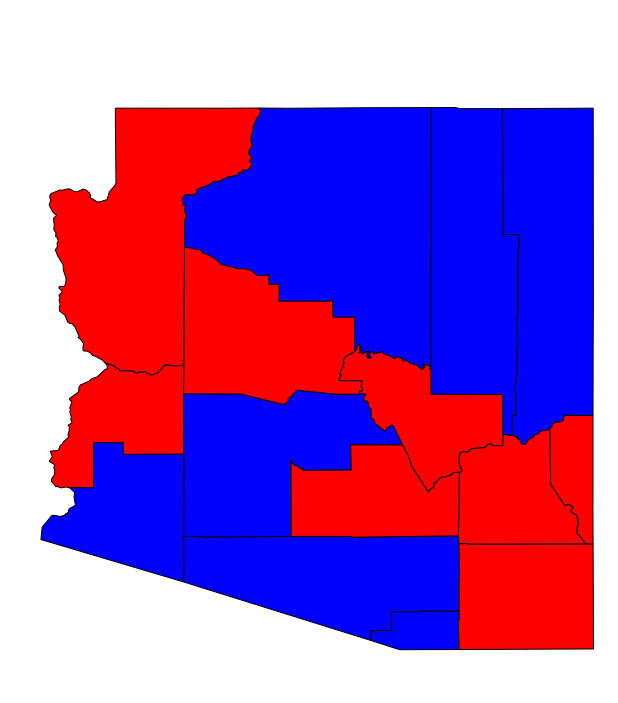

In [31]:
county = gpd.read_file('azcounty/azcounties.shp')
county.rename(columns={'NAME':'County_x'},inplace=True)
county = pd.merge(az_data[['County_x', 'binary_clusters']], county, on='County_x')
cmap_politics_2 = matplotlib.colors.LinearSegmentedColormap.from_list("", ["blue","red"])
county = gpd.GeoDataFrame(county)
county.plot(column="binary_clusters", cmap=cmap_politics_2)
plt.axis('off')
plt.show()

### Florida County Analysis

In [32]:
clustering_cols_analysis = ['2012_d', '2012_r', '2016_d', '2016_r','percent_male_18_24','percent_male_25_34','percent_female_18_24','percent_female_25_34','percent_white', 'percent_black','percent_native','percent_other']
kmeans = KMeans(n_clusters=3, random_state=0).fit(fl_data[clustering_cols_analysis])

labels = kmeans.labels_
fl_data['fl_clusters'] = labels
#az_data.head()

/Users/joshkuppersmith/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [33]:
cluster_data = []
for label in list(set(list(fl_data['fl_clusters']))):
    data_clust = fl_data[fl_data['fl_clusters'] == label]
    individual = {}
    print("Cluster Number: " + str(label))
    print("Counties: " + str(list(data_clust['County_x'])))
    print("Percent 18-24: " + str(np.average(list(data_clust['percent_male_18_24'])+ np.average(list(data_clust['percent_female_18_24'])))*100.0) + "%")
    print("Percent White: " + str(np.average(list(data_clust['percent_white']))*100.0) + "%")
    print("Percent Black: " + str(np.average(list(data_clust['percent_black']))*100.0) + "%")
    print("Percent Native American: " + str(np.average(list(data_clust['percent_native']))*100.0) + "%")
    print("Percent Other: " + str(np.average(list(data_clust['percent_other']))*100.0) + "%")
    print("Percent Male: " + str(np.average(list(data_clust['percent_male']))*100.0) + "%")
    print("Percent Female: " + str(np.average(list(data_clust['percent_female']))*100.0) + "%")
    print("Percent Dem: " + str(np.average(list(data_clust['2016_d']))*100.0) + "%")
    print()
    print('------------------')
    print()

Cluster Number: 0
Counties: ['Baker', 'Bay', 'Bradford', 'Calhoun', 'Clay', 'Columbia', 'Dixie', 'Franklin', 'Gilchrist', 'Gulf', 'Hardee', 'Holmes', 'Jackson', 'Lafayette', 'Levy', 'Liberty', 'Nassau', 'Okaloosa', 'St. Johns', 'Santa Rosa', 'Sumter', 'Suwannee', 'Taylor', 'Union', 'Wakulla', 'Walton', 'Washington']
Percent 18-24: 8.254400265935418%
Percent White: 82.19533669628824%
Percent Black: 12.674482342540038%
Percent Native American: 0.48237761753699887%
Percent Other: 1.3346839003247681%
Percent Male: 53.829176761967034%
Percent Female: 46.170823238032966%
Percent Dem: 22.841300984641023%

------------------

Cluster Number: 1
Counties: ['Brevard', 'Charlotte', 'Citrus', 'Collier', 'Escambia', 'Flagler', 'Glades', 'Hamilton', 'Hendry', 'Hernando', 'Highlands', 'Indian River', 'Lake', 'Lee', 'Manatee', 'Marion', 'Martin', 'Monroe', 'Okeechobee', 'Pasco', 'Pinellas', 'Polk', 'Putnam', 'Sarasota', 'Seminole', 'Volusia']
Percent 18-24: 7.644140415005304%
Percent White: 83.01945966

In [34]:
binary = []
for index, row in fl_data.iterrows():
    if row.fl_clusters == 2:
        binary.append(1)
    else:
        binary.append(2)
        
fl_data['binary_clusters'] = binary

/Users/joshkuppersmith/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [35]:
def strip(string):
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    no_punct = ""
    for char in string:
        if char not in punctuations:
            no_punct = no_punct + char
    return no_punct

/Users/joshkuppersmith/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


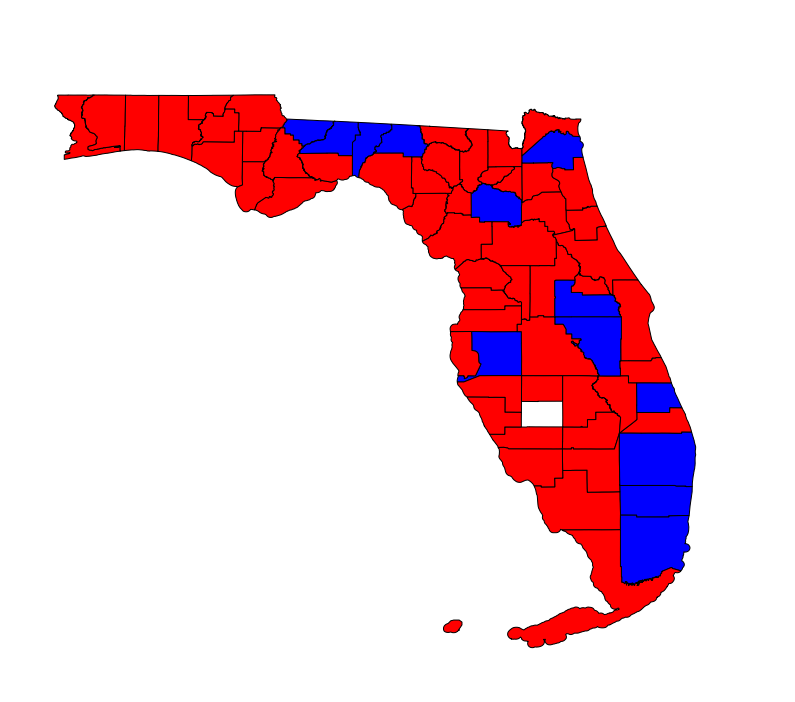

In [36]:
county = gpd.read_file('scuov/scuo.shp')
county = county[county.STATE == 'FL']
#print(len(county[county.STATE == 'FL']))
#print(len(fl_data))
county.head()
county.rename(columns={'NAME':'County_x'},inplace=True)
county['county_lower'] = county['County_x'].str.lower().apply(lambda x: strip(x))
fl_data['county_lower'] = fl_data['County_x'].str.lower().apply(lambda x: strip(x))
county = pd.merge(fl_data[['county_lower', 'binary_clusters']], county, on='county_lower')
#cmap_politics_2 = matplotlib.colors.LinearSegmentedColormap.from_list("", ["blue","red"])
county = gpd.GeoDataFrame(county)
county.plot(column="binary_clusters", cmap=cmap_politics_2)
plt.axis('off')
plt.show()

### Georgia County Analysis

In [37]:
clustering_cols_analysis = ['2012_d', '2012_r', '2016_d', '2016_r','percent_male_18_24','percent_male_25_34','percent_female_18_24','percent_female_25_34','percent_white', 'percent_black','percent_native','percent_other']
kmeans = KMeans(n_clusters=3, random_state=0).fit(ga_data[clustering_cols_analysis])

labels = kmeans.labels_
ga_data['ga_clusters'] = labels

/Users/joshkuppersmith/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [38]:

for label in list(set(list(ga_data['ga_clusters']))):
    data_clust = ga_data[ga_data['ga_clusters'] == label]
    individual = {}
    print("Cluster Number: " + str(label))
    print("Counties: " + str(list(data_clust['County_x'])))
    print("Percent 18-24: " + str(np.average(list(data_clust['percent_male_18_24'])+ np.average(list(data_clust['percent_female_18_24'])))*100.0) + "%")
    print("Percent White: " + str(np.average(list(data_clust['percent_white']))*100.0) + "%")
    print("Percent Black: " + str(np.average(list(data_clust['percent_black']))*100.0) + "%")
    print("Percent Native American: " + str(np.average(list(data_clust['percent_native']))*100.0) + "%")
    print("Percent Other: " + str(np.average(list(data_clust['percent_other']))*100.0) + "%")
    print("Percent Male: " + str(np.average(list(data_clust['percent_male']))*100.0) + "%")
    print("Percent Female: " + str(np.average(list(data_clust['percent_female']))*100.0) + "%")
    print("Percent Dem: " + str(np.average(list(data_clust['2016_d']))*100.0) + "%")
    print()
    print('------------------')
    print()

Cluster Number: 0
Counties: ['Baldwin', 'Bibb', 'Burke', 'Chatham', 'Clarke', 'Clayton', 'DeKalb', 'Dooly', 'Dougherty', 'Douglas', 'Early', 'Fulton', 'Hancock', 'Henry', 'Jefferson', 'Macon', 'Mitchell', 'Muscogee', 'Newton', 'Peach', 'Quitman', 'Randolph', 'Richmond', 'Rockdale', 'Stewart', 'Talbot', 'Taliaferro', 'Terrell', 'Twiggs', 'Warren', 'Webster']
Percent 18-24: 10.31077530305337%
Percent White: 42.48359794672628%
Percent Black: 51.7109685099099%
Percent Native American: 0.15900394987587643%
Percent Other: 2.0658484417585576%
Percent Male: 49.4800963534584%
Percent Female: 50.5199036465416%
Percent Dem: 57.17616733282734%

------------------

Cluster Number: 1
Counties: ['Appling', 'Bacon', 'Banks', 'Barrow', 'Bartow', 'Berrien', 'Brantley', 'Bryan', 'Catoosa', 'Chattooga', 'Cherokee', 'Columbia', 'Coweta', 'Dade', 'Dawson', 'Echols', 'Effingham', 'Fannin', 'Floyd', 'Forsyth', 'Franklin', 'Gilmer', 'Glascock', 'Gordon', 'Habersham', 'Hall', 'Haralson', 'Harris', 'Hart', 'Hear

In [39]:
binary = []
for index, row in ga_data.iterrows():
    if row.ga_clusters == 0:
        binary.append(1)
    else:
        binary.append(2)
        
ga_data['binary_clusters'] = binary

/Users/joshkuppersmith/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


/Users/joshkuppersmith/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


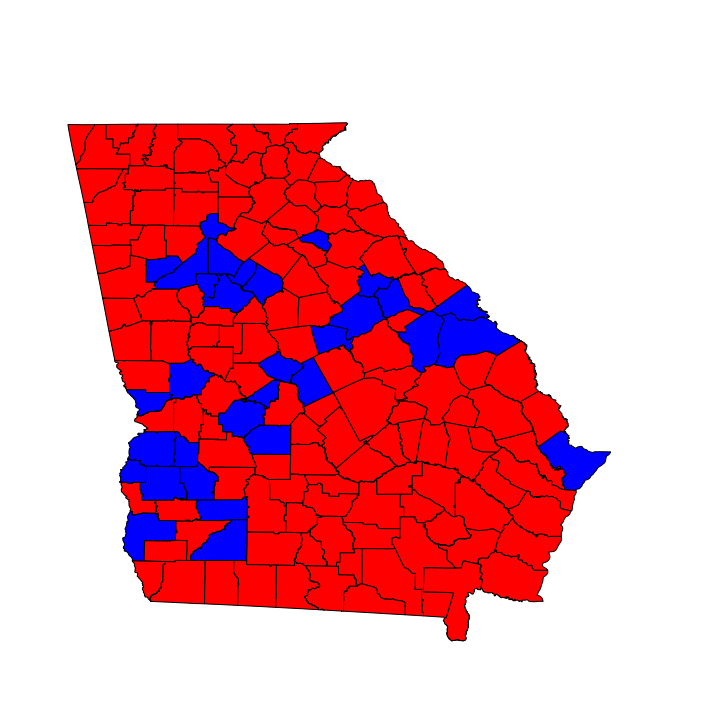

In [40]:
county = gpd.read_file('scuov/scuo.shp')
county = county[county.STATE == 'GA']
#print(len(county[county.STATE == 'FL']))
#print(len(fl_data))
county.head()
county.rename(columns={'NAME':'County_x'},inplace=True)
county['county_lower'] = county['County_x'].str.lower().apply(lambda x: strip(x))
ga_data['county_lower'] = ga_data['County_x'].str.lower().apply(lambda x: strip(x))
county = pd.merge(ga_data[['county_lower', 'binary_clusters']], county, on='county_lower')
#cmap_politics_2 = matplotlib.colors.LinearSegmentedColormap.from_list("", ["blue","red"])
county = gpd.GeoDataFrame(county)
county.plot(column="binary_clusters", cmap=cmap_politics_2)
plt.axis('off')
plt.show()

### North Carolina

In [41]:
clustering_cols_analysis = ['2012_d', '2012_r', '2016_d', '2016_r','percent_male_18_24','percent_male_25_34','percent_female_18_24','percent_female_25_34','percent_white', 'percent_black','percent_native','percent_other']
kmeans = KMeans(n_clusters=3, random_state=0).fit(nc_data[clustering_cols_analysis])

labels = kmeans.labels_
nc_data['nc_clusters'] = labels

/Users/joshkuppersmith/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [42]:
for label in list(set(list(nc_data['nc_clusters']))):
    data_clust = nc_data[nc_data['nc_clusters'] == label]
    individual = {}
    print("Cluster Number: " + str(label))
    print("Counties: " + str(list(data_clust['County_x'])))
    print("Percent 18-24: " + str(np.average(list(data_clust['percent_male_18_24'])+ np.average(list(data_clust['percent_female_18_24'])))*100.0) + "%")
    print("Percent White: " + str(np.average(list(data_clust['percent_white']))*100.0) + "%")
    print("Percent Black: " + str(np.average(list(data_clust['percent_black']))*100.0) + "%")
    print("Percent Native American: " + str(np.average(list(data_clust['percent_native']))*100.0) + "%")
    print("Percent Other: " + str(np.average(list(data_clust['percent_other']))*100.0) + "%")
    print("Percent Male: " + str(np.average(list(data_clust['percent_male']))*100.0) + "%")
    print("Percent Female: " + str(np.average(list(data_clust['percent_female']))*100.0) + "%")
    print("Percent Dem: " + str(np.average(list(data_clust['2016_d']))*100.0) + "%")
    print()
    print('------------------')
    print()

Cluster Number: 0
Counties: ['Alexander', 'Alleghany', 'Ashe', 'Avery', 'Brunswick', 'Caldwell', 'Camden', 'Carteret', 'Catawba', 'Cherokee', 'Clay', 'Currituck', 'Dare', 'Davidson', 'Davie', 'Forsyth', 'Gaston', 'Graham', 'Haywood', 'Henderson', 'Iredell', 'Jackson', 'Johnston', 'Lincoln', 'McDowell', 'Madison', 'Mitchell', 'Montgomery', 'Moore', 'Onslow', 'Pender', 'Polk', 'Rowan', 'Rutherford', 'Stanly', 'Stokes', 'Surry', 'Transylvania', 'Union', 'Wayne', 'Wilkes', 'Yadkin', 'Yancey']
Percent 18-24: 8.304250966050086%
Percent White: 86.4926336957563%
Percent Black: 7.846066385145869%
Percent Native American: 0.8393503494104979%
Percent Other: 2.0434490689251716%
Percent Male: 49.30048360411178%
Percent Female: 50.699516395888224%
Percent Dem: 28.321563270359295%

------------------

Cluster Number: 1
Counties: ['Alamance', 'Beaufort', 'Bladen', 'Buncombe', 'Burke', 'Cabarrus', 'Caswell', 'Chatham', 'Chowan', 'Cleveland', 'Columbus', 'Craven', 'Duplin', 'Franklin', 'Gates', 'Granvil

In [43]:
binary = []
for index, row in nc_data.iterrows():
    if row.nc_clusters == 2:
        binary.append(1)
    else:
        binary.append(2)
        
nc_data['binary_clusters'] = binary

/Users/joshkuppersmith/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


/Users/joshkuppersmith/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


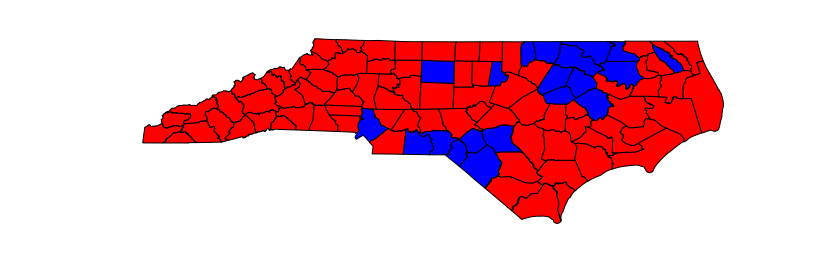

In [44]:
county = gpd.read_file('scuov/scuo.shp')
county = county[county.STATE == 'NC']
#print(len(county[county.STATE == 'FL']))
#print(len(fl_data))
county.head()
county.rename(columns={'NAME':'County_x'},inplace=True)
county['county_lower'] = county['County_x'].str.lower().apply(lambda x: strip(x))
nc_data['county_lower'] = nc_data['County_x'].str.lower().apply(lambda x: strip(x))
county = pd.merge(nc_data[['county_lower', 'binary_clusters']], county, on='county_lower')
#cmap_politics_2 = matplotlib.colors.LinearSegmentedColormap.from_list("", ["blue","red"])
county = gpd.GeoDataFrame(county)
county.plot(column="binary_clusters", cmap=cmap_politics_2)
plt.axis('off')
plt.show()